
data source:

https://www.kaggle.com/rio2016/olympic-games/kernels

In [8]:
import pandas as pd

athletes = pd.read_csv("athletes.csv")
athletes.head()

In [147]:
#!pip install plotly==4.8.2
import plotly.express as px
df = px.data.gapminder()
df = df.drop_duplicates(subset=['country'], keep='last')
df.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [141]:
birth_date = date(2014,6,5)
age = (date.today() - birth_date) / timedelta(days=365.2425)
age

6.111008439598349

In [175]:
from datetime import date

def calculate_age(born, today=date.today()):
  age = max(today.year - born.year - ((today.month, today.day) < (born.month, born.day)),0)
  if age == 0:
    age = np.nan
  return age

calculate_age(pd.to_datetime('2014-06-05'), today=pd.to_datetime('2016-08-05'))

2

In [176]:
# from datetime import timedelta
df10 = athletes.copy()

# df10['age'] = df10['dob'].apply(lambda x: (start_olymp - x) // timedelta(days=365.2425))
df10['dob'] = pd.to_datetime(df10['dob'], format="%m/%d/%y")
start_olymp = date(2016,8,5) # Rio: Aug 5, 2016 – Aug 21, 2016
df10['age'] = df10['dob'].apply(lambda x: calculate_age(x, today=start_olymp))

df10['medal'] = df10['gold'] + df10['silver'] + df10['bronze']
df10.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,medal
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46.0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29.0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24.0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25.0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25.0,0


In [208]:
df10.nlargest(10,'medal')

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,medal
7401,491565031,Michael Phelps,USA,male,1985-06-30,1.94,90.0,aquatics,5,1,0,31.0,6
5550,960103057,Katie Ledecky,USA,female,1997-03-17,1.83,72.0,aquatics,4,1,0,19.0,5
9895,770111957,Simone Biles,USA,female,1997-03-14,1.45,47.0,gymnastics,4,0,1,19.0,5
3048,661638106,Emma McKeon,AUS,female,1994-05-24,1.80,60.0,aquatics,1,2,1,22.0,4
5554,643664378,Katinka Hosszu,HUN,female,1989-05-03,1.75,68.0,aquatics,3,1,0,27.0,4
6522,37020908,Madeline Dirado,USA,female,1993-04-05,1.76,64.0,aquatics,2,1,1,23.0,4
7936,776128059,Nathan Adrian,USA,male,1988-12-07,1.99,102.0,aquatics,2,0,2,27.0,4
8593,239797947,Penny Oleksiak,CAN,female,2000-06-13,1.86,68.0,aquatics,1,1,2,16.0,4
9902,973414226,Simone Manuel,USA,female,1996-08-02,1.78,72.0,aquatics,2,2,0,20.0,4
418,71010173,Alexandra Raisman,USA,female,1994-05-25,1.58,52.0,gymnastics,1,2,0,22.0,3


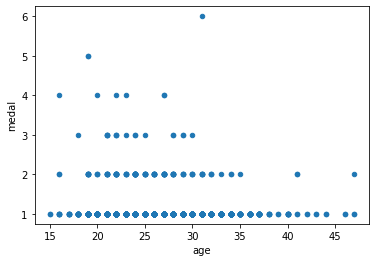

In [214]:
df10[df10['medal']>0].plot(x='age',y='medal',kind="scatter");

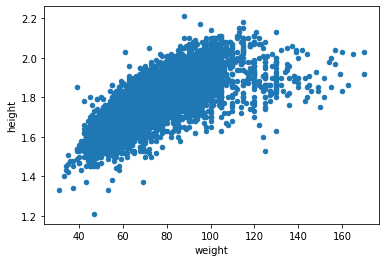

In [106]:
df10.plot(x='weight',y='height',kind="scatter");

In [108]:
df10.corr()

,id,height,weight,gold,silver,bronze,age,medal
id,1.000000,0.004336,0.003137,0.008290,-0.020803,0.011978,-0.003943,0.000143
height,0.004336,1.000000,0.759037,0.049285,0.041002,0.020865,0.064126,0.064204
weight,0.003137,0.759037,1.000000,0.035854,0.030944,0.026113,0.071162,0.053426
gold,0.008290,0.049285,0.035854,1.000000,0.024349,0.004682,-0.000099,0.613288
silver,-0.020803,0.041002,0.030944,0.024349,1.000000,-0.014844,0.005239,0.564047
bronze,0.011978,0.020865,0.026113,0.004682,-0.014844,1.000000,-0.017758,0.562186
age,-0.003943,0.064126,0.071162,-0.000099,0.005239,-0.017758,1.000000,-0.007217
medal,0.000143,0.064204,0.053426,0.613288,0.564047,0.562186,-0.007217,1.000000


In [10]:
athletes.groupby(by=['nationality','sex']).count()[["id"]]

id
nationality sex       
AFG         female   1
            male     2
ALB         female   3
            male     3
ALG         female  10
...                 ..
YEM         male     2
ZAM         female   2
            male     5
ZIM         female  26
            male     9

[408 rows x 1 columns]

In [187]:
df11 = athletes.groupby(by=['nationality','sex']).count()[["id"]].reset_index()
df11.rename(columns={'id':'athletes'}, inplace=True)
df11

,nationality,sex,athletes
0,AFG,female,1
1,AFG,male,2
2,ALB,female,3
3,ALB,male,3
4,ALG,female,10
...,...,...,...
403,YEM,male,2
404,ZAM,female,2
405,ZAM,male,5
406,ZIM,female,26


In [190]:
df12 = athletes.groupby(by=['sport','sex']).count()[["id"]].reset_index()
df12.rename(columns={'id':'athletes'}, inplace=True)
df12

,sport,sex,athletes
0,aquatics,female,716
1,aquatics,male,729
2,archery,female,64
3,archery,male,64
4,athletics,female,1137
5,athletics,male,1226
6,badminton,female,86
7,badminton,male,86
8,basketball,female,144
9,basketball,male,144


In [198]:
df13 = df10.groupby(by=['sport','sex']).sum()[["medal"]].reset_index()
#df13.rename(columns={'id':'athletes'}, inplace=True)
df13

,sport,sex,medal
0,aquatics,female,187
1,aquatics,male,151
2,archery,female,12
3,archery,male,12
4,athletics,female,95
5,athletics,male,97
6,badminton,female,12
7,badminton,male,12
8,basketball,female,36
9,basketball,male,36


#TODO: Adjust team sports medals
Medals are by athlete, but there are some team sports that account only one medal for the country

In [200]:
fig = px.treemap(df13, path=['sport', 'sex'], 
                 values='medal', color='medal',
                 hover_data={"medal": False},
                 color_continuous_scale='RdBu',
                 title='Medals in Rio 2016 by sport and sex')
fig.show()

In [193]:
fig = px.treemap(df12, path=['sport', 'sex'], 
                 values='athletes', color='athletes',
                 hover_data={"athletes": False},
                 color_continuous_scale='RdBu',
                 title='Athletes in Rio 2016 by sport and sex')
fig.show()

In [192]:
fig = px.treemap(df12, path=['sex', 'sport'], 
                 values='athletes', color='athletes',
                 hover_data={"athletes": False},
                 color_continuous_scale='RdBu',
                 title='Athletes in Rio 2016 by sport and sex')
fig.show()

In [189]:
fig = px.treemap(df11, path=['nationality', 'sex'], 
                 values='athletes', color='athletes',
                 hover_data={"athletes": False},
                 color_continuous_scale='RdBu',
                 title='Athletes in Rio 2016 by country and sex')
fig.show()

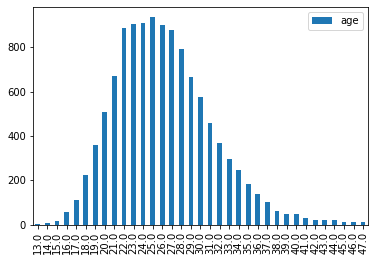

In [177]:
pd.DataFrame(df10["age"].value_counts()).sort_index().plot(kind="bar");

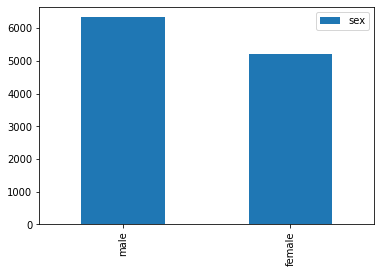

In [158]:
pd.DataFrame(athletes["sex"].value_counts()).plot(kind="bar");

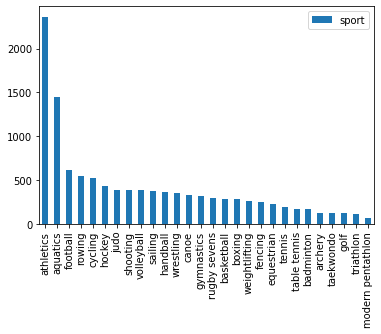

In [157]:
pd.DataFrame(athletes["sport"].value_counts()).plot(kind="bar");

In [181]:
athletes.groupby(by=['sport']).count()[["id"]]

,id
sport,
aquatics,1445
archery,128
athletics,2363
badminton,172
basketball,288
boxing,286
canoe,331
cycling,525
equestrian,222


In [11]:
df2 = athletes.groupby(by='nationality').count()[["id"]]
df2.columns=["athletes"]
df2

df3 = athletes.groupby(by='nationality').sum()
df3=df3[["gold","silver","bronze"]]
df3["medals"] = df3["gold"] + df3["silver"]  + df3["bronze"]

df4 = df2.join(df3)
df4.index.name="iso_alpha"
df4.reset_index(inplace=True)
df4['iso_alpha']


0      AFG
1      ALB
2      ALG
3      AND
4      ANG
      ... 
202    VIE
203    VIN
204    YEM
205    ZAM
206    ZIM
Name: iso_alpha, Length: 207, dtype: object

In [12]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [14]:
df4.head()

,iso_alpha,athletes,gold,silver,bronze,medals
0,AFG,3,0,0,0,0
1,ALB,6,0,0,0,0
2,ALG,68,0,2,0,2
3,AND,5,0,0,0,0
4,ANG,26,0,0,0,0


In [16]:
df5 = df.merge(df4, on=('iso_alpha'))
df5.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,athletes,gold,silver,bronze,medals
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,3,0,0,0,0
1,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,6,0,0,0,0
2,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,223,21,1,0,22
3,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36,431,23,34,25,82
4,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40,71,0,0,2,2


In [72]:


fig = px.choropleth(df5, locations="iso_alpha",
                    color="athletes", 
                    hover_name="country", # column to add to hover information
                    hover_data={"iso_alpha": False,
                                "athletes":True,
                                "medals": True,
                                "gold":True,
                                "silver":True,
                                "bronze":True},
                    color_continuous_scale='RdBu',
                    title="Athletes in Rio 2016 by country")
fig.show()

In [49]:
df5["world"] = "world" # in order to have a single root node
fig = px.treemap(df5, path=['world', 'continent', 'country'],
                 values='athletes', color='athletes',
                 hover_data={"athletes": False
                             "medals": True,
                             "gold":True,
                             "silver":True,
                             "bronze":True,
                             "athletes":True},
                  color_continuous_scale='RdBu',
                 title='Athletes in Rio 2016 by country')
fig.show()

In [66]:
fig = px.treemap(df5[df5['medals']>0], path=['world', 'continent', 'country'], 
                 values='medals', color='medals',
                 hover_data={"medals": False,
                             "gold":True,
                             "silver":True,
                             "bronze":True,
                             "athletes":True},
                  color_continuous_scale='RdBu',
                 title='Medals in Rio 2016 by country')
fig.show()